In [14]:
import torch
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.datasets import make_blobs
import torch.nn.functional as F

C:\ProgramData\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufu

## Tensor

In [11]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [12]:
print("size", x.size())
print("Shape:", x.shape)
print("랭크(차원) :" ,x.ndimension())

size torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원) : 2


### Unsqueeze
x ([3,3]형태의 랭크2 텐서)의 첫번째 (0번째)자리에 1이라는 차원값을 추가해 [1,3,3] 모양의 랭크 3텐서로 변경

In [13]:
x = torch.unsqueeze(x,0)
print(x)
print("size", x.size())
print("Shape:", x.shape)
print("랭크(차원) :" ,x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원) : 3


### squeeze
텐서의 랭크중 크기가 1인 랭크를 삭제

In [14]:
x = torch.squeeze(x)
print(x)
print("size", x.size())
print("Shape:", x.shape)
print("랭크(차원) :" ,x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원) : 2


### view
직접 텐서의 모양 바꿀 수 있음

In [15]:
x = x.view(9)
print(x)
print("size", x.size())
print("Shape:", x.shape)
print("랭크(차원) :" ,x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size torch.Size([9])
Shape: torch.Size([9])
랭크(차원) : 1


원소의 수는 그대로 유지되야함

[2,4]가 되도록하면 실패

In [16]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


## 텐서를 이용한 연산과 행렬곱

행렬의 높이를 '행', 행렬의 너비를 '열'

행렬곱 : 
    - A의 열수와 B의 행 수는 같아야함
    - 행렬곱 A*B의 결과 행렬의 개수는 A와 같고, 열의 갯수는 B와 같음
    
    
예:
    - 행렬 w와 b는 정규분포에서 5 X 3, 5 X 3의 shape를 가진 텐서를 만듦
    - x : 임의의로 집어 넣음 



In [22]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-0.2634, -1.3664, -0.5024],
        [-0.7948,  2.6435, -0.5829],
        [ 1.2369,  0.3499, -1.5676],
        [ 0.2514,  0.2866,  0.7861],
        [ 0.2435,  0.4215,  1.3294]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [23]:
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[-0.9912,  2.5410],
        [ 0.2969,  1.7376],
        [ 1.5207,  2.0761],
        [-1.8175, -0.2843],
        [ 0.0835,  1.9002]])


행렬곱

In [24]:

wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[-6.8749, -9.0072],
        [ 4.2213,  5.4871],
        [-5.5514, -5.5322],
        [ 5.0417,  6.3658],
        [ 8.1549, 10.1493]])


행렬곱 + b

In [25]:
result = wx + b	
print("result size:", result.size()) 
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[-7.8661, -6.4662],
        [ 4.5182,  7.2248],
        [-4.0308, -3.4561],
        [ 3.2242,  6.0814],
        [ 8.2384, 12.0495]])


## Autogard (자동 기울기)

수식의 기울기를 자동으로 계산 -> 경사하강법

값이 1.0인 스칼라텐서를 정의하고, 수식을 w에 대해 미분하여 기울기를 계산해보자

In [35]:
w = torch.tensor(1.0, requires_grad = True)

a = w *3

I = a**2

I.backward()
print("I를 w로 미분한값 : {}".format(w.grad))

I를 w로 미분한값 : 18.0


### 이미지 노이즈 제거

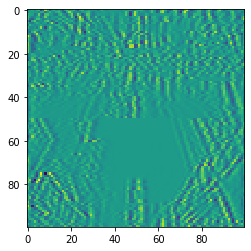

In [8]:
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

plt.imshow(broken_image.view(100,100))

In [9]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [11]:
random_tensor = torch.randn(10000, dtype = torch.float)

lr = 0.8

In [12]:
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.3062105178833
Loss at 1000 = 1.1280852556228638
Loss at 2000 = 0.5467530488967896
Loss at 3000 = 0.3785193860530853
Loss at 4000 = 0.29904207587242126
Loss at 5000 = 0.25017663836479187
Loss at 6000 = 0.21507805585861206
Loss at 7000 = 0.1873287409543991
Loss at 8000 = 0.16394460201263428
Loss at 9000 = 0.14332996308803558
Loss at 10000 = 0.12455783784389496
Loss at 11000 = 0.10705842822790146
Loss at 12000 = 0.09046803414821625
Loss at 13000 = 0.07454732060432434
Loss at 14000 = 0.059135712683200836
Loss at 15000 = 0.044126007705926895
Loss at 16000 = 0.029448295012116432
Loss at 17000 = 0.02115311659872532
Loss at 18000 = 0.021165482699871063
Loss at 19000 = 0.02116730436682701


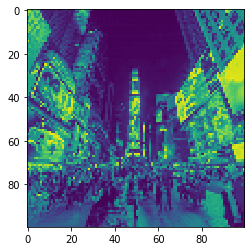

In [13]:
plt.imshow(random_tensor.view(100,100).data)


## ANN

In [15]:

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [17]:

def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

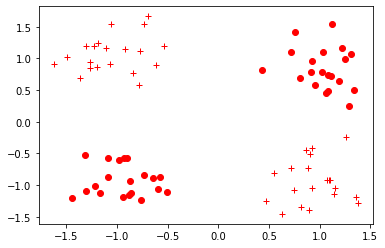

In [18]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [19]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [22]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

In [23]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [24]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.716407835483551


In [25]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7212819457054138
Train loss at 100 is 0.6397565603256226
Train loss at 200 is 0.5585909485816956
Train loss at 300 is 0.48787015676498413
Train loss at 400 is 0.43800443410873413
Train loss at 500 is 0.39608970284461975
Train loss at 600 is 0.34887629747390747
Train loss at 700 is 0.29310551285743713
Train loss at 800 is 0.2365502417087555
Train loss at 900 is 0.18653300404548645
Train loss at 1000 is 0.14623959362506866
Train loss at 1100 is 0.11611511558294296
Train loss at 1200 is 0.09397302567958832
Train loss at 1300 is 0.07732221484184265
Train loss at 1400 is 0.0646342858672142
Train loss at 1500 is 0.05490458011627197
Train loss at 1600 is 0.047357574105262756
Train loss at 1700 is 0.04145807772874832
Train loss at 1800 is 0.03678387403488159
Train loss at 1900 is 0.0329970046877861


In [26]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.05257025361061096


In [27]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.6826, -0.9408],
        [-1.1286, -0.3767],
        [ 0.9501,  0.9822],
        [-1.4324,  1.9764],
        [ 1.4526,  1.5141]])), ('linear_1.bias', tensor([ 0.3925,  0.8584, -0.3116, -0.1551, -0.2702])), ('linear_2.weight', tensor([[ 1.8964, -1.3411, -1.1908,  2.3678, -2.0265]])), ('linear_2.bias', tensor([-0.7650]))])


In [28]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9916689395904541
